# Examples

[112.78381052  -0.38524266   3.88248064   0.32106973]


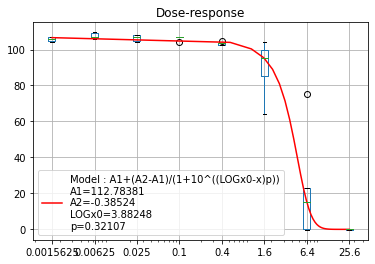

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def func(x,A1,A2,LOGx0,p):
    return A1+(A2-A1)/(1+10**((LOGx0-x)*p))

# plt.plot(xdata,ydata,'b-',label='data')
xdata = [25.6, 6.4, 1.6, 0.4, 0.1, 0.025, 0.00625, 0.0015625]
ydata = [ -0.37, 14.82, 95.32, 103.61, 107.06, 107.18, 107.31, 105.69 ]
# np.random.seed(1729)
# y_noise=10*np.random.normal(size=xdata.size)
# ydata=y+y_noise

result = [[-0.7, -0.58, 64.02, 102.5, 104.14, 108.06, 106.06, 106.95],
          [-0.35, -0.05, 85.25, 102.65, 107.33, 107.99, 107.31, 106.94],
          [-0.06, 22.65, 104, 105.08, 107.06, 104.63, 106.55, 104.5],
          [-0.37, 14.82, 95.32, 103.61, 107.12, 104.42, 109.72, 104.82],
          [-0.7, 75.12, 99.95, 103.62, 106.91, 107.18, 109.22, 105.69],
         ]
data_frame = pd.DataFrame(result,columns=xdata)

plt.xscale('log')
plt.title('Dose-response')

w = 0.1
width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)

position = pd.Series(xdata)
data_frame.boxplot(positions=position,widths=width(position,w))
# data_frame.scatterplot(positions=pd.Series(xdata))

# for idx in data_frame.index:
#     plt.scatter(xdata,data_frame.iloc[idx])
# xdataSeries=pd.Series(xdata)
# print(xdataSeries.T)
# plt.figure(figsize=(15,10))

popt, pcov = curve_fit(func,xdata,ydata)
print(popt)

x_test=np.linspace(min(xdata),max(xdata),50)
plt.plot(x_test, func(x_test, *popt), 'r-',label='Model : A1+(A2-A1)/(1+10^((LOGx0-x)p))\nA1=%5.5f\nA2=%5.5f\nLOGx0=%5.5f\np=%5.5f' % tuple(popt))
# plt.text(x=1,y=1,s='Model : A1+(A2-A1)/(1+10**((LOGx0-x)*p))')
plt.legend()
plt.show()